<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-08 19:39:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  71.2MB/s    in 2.8s    

2025-07-08 19:39:22 (71.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [ ]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 154.5 MB/s eta 0:00:00


In [3]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 99.5 MB/s eta 0:00:00


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Connect to the SQLite database


In [2]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [3]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [4]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [5]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


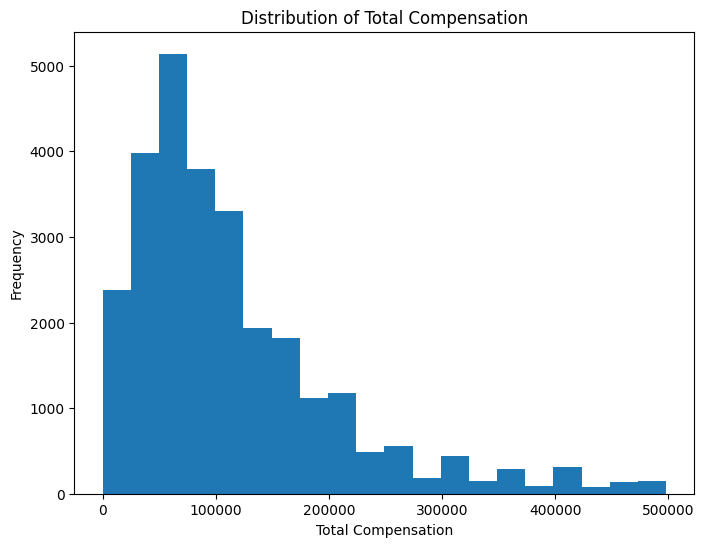

In [6]:
## Write your code here
QUERY = "SELECT CompTotal FROM main"
df_comptotal = pd.read_sql_query(QUERY, conn)
df_comptotal=df_comptotal.dropna().reset_index(drop=True)
df_comptotal['CompTotal'] = pd.to_numeric(df_comptotal['CompTotal'], errors='coerce')
df_comptotal = df_comptotal[df_comptotal['CompTotal'] < 500000].copy()

plt.figure(figsize=(8, 6))
plt.hist(df_comptotal['CompTotal'], bins=20)
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


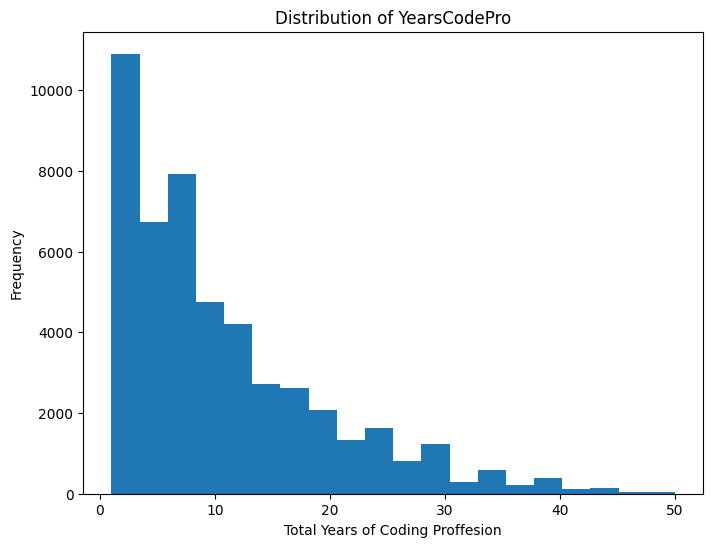

In [7]:
## Write your code here
QUERY = "SELECT YearsCodePro FROM main"
df_ycp = pd.read_sql_query(QUERY, conn)
df_ycp = df_ycp.dropna().reset_index(drop=True)
df_ycp['YearsCodePro'] = pd.to_numeric(df_ycp['YearsCodePro'], errors='coerce')


plt.figure(figsize=(8, 6))
plt.hist(df_ycp['YearsCodePro'], bins=20)
plt.xlabel('Total Years of Coding Proffesion')
plt.ylabel('Frequency')
plt.title('Distribution of YearsCodePro')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


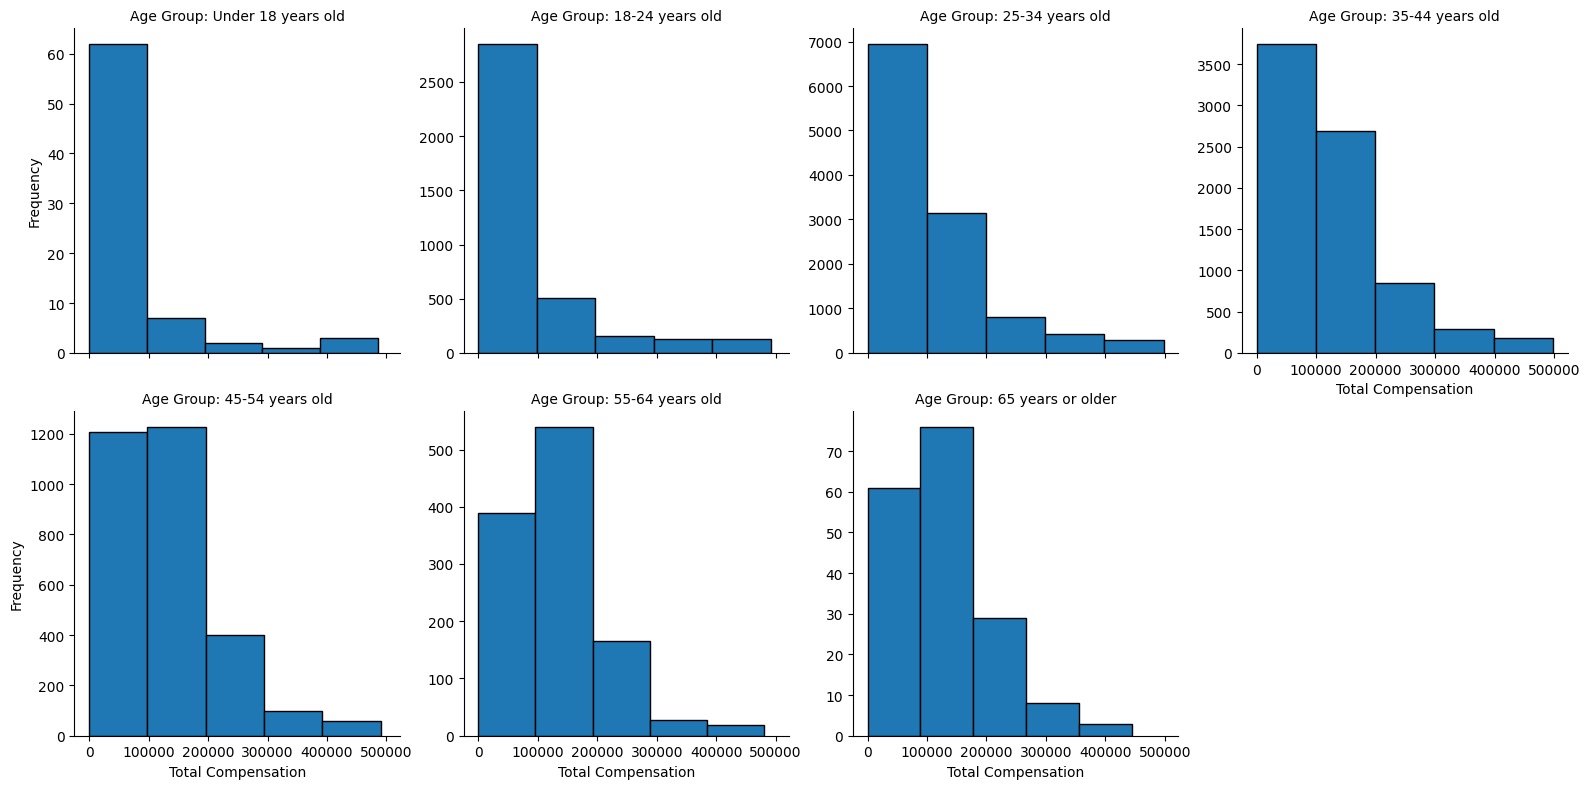

In [8]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""

df_age_comptotal = pd.read_sql_query(QUERY, conn)
df_age_comptotal['CompTotal'] = pd.to_numeric(df_age_comptotal['CompTotal'], errors='coerce')

df_age_comptotal.dropna(subset=['Age', 'CompTotal'], inplace=True)

# Filter out extremely large values that might skew the visualization
df_age_comptotal = df_age_comptotal[df_age_comptotal['CompTotal'] < 500000].copy()

# Define age groups in the desired order for plotting
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Convert 'Age' to a categorical type with a defined order and remove 'Prefer not to say'
df_age_comptotal['Age'] = pd.Categorical(df_age_comptotal['Age'], categories=age_order, ordered=True)
df_age_comptotal.dropna(subset=['Age'], inplace=True) # This will drop rows where Age was 'Prefer not to say'


# Create a FacetGrid for plotting histograms by Age group
g = sns.FacetGrid(df_age_comptotal, col='Age', col_wrap=4, height=4, aspect=1, sharey=False)
g.map(plt.hist, 'CompTotal', bins=5, edgecolor='black') # Adjust bins as needed
g.set_axis_labels('Total Compensation', 'Frequency')
g.set_titles('Age Group: {col_name}')
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


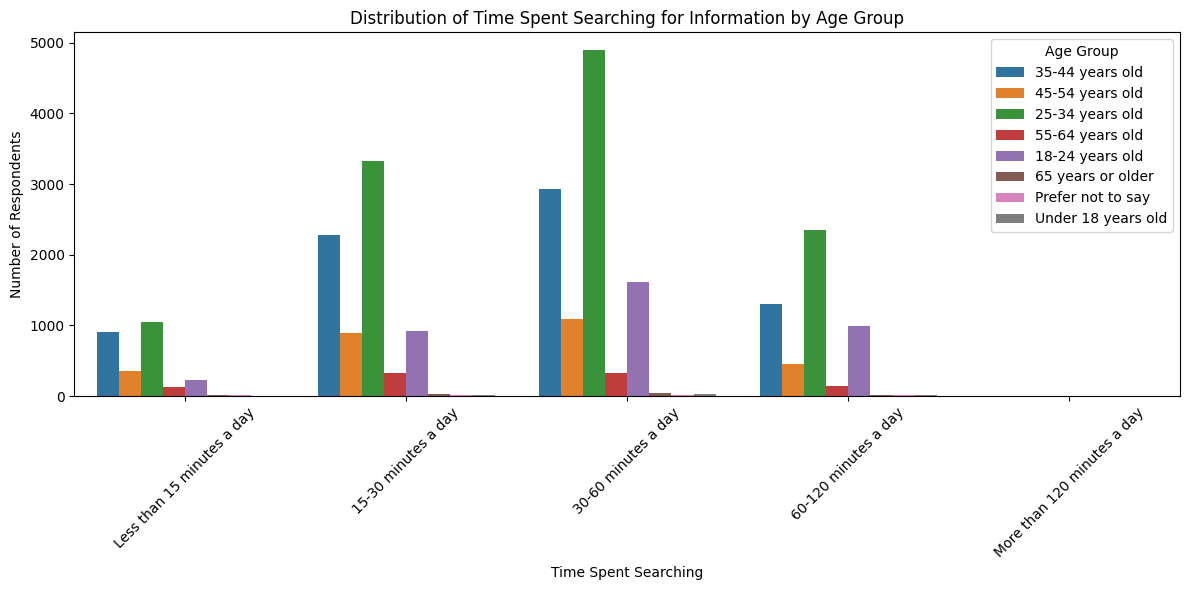

In [9]:
## Write your code here
QUERY = """
SELECT Age,TimeSearching
FROM main
"""

df_timeSearchingl = pd.read_sql_query(QUERY, conn)
df_timeSearchingl = df_timeSearchingl.dropna().reset_index(drop=True)

time_order = ['Less than 15 minutes a day', '15-30 minutes a day', '30-60 minutes a day', '60-120 minutes a day', 'More than 120 minutes a day']

df_timeSearchingl['TimeSearching'] = pd.Categorical(df_timeSearchingl['TimeSearching'], categories=time_order, ordered=True)

# Plot count plots (histogram-like bar plots) for each Age group
plt.figure(figsize=(12, 6))
sns.countplot(data=df_timeSearchingl, x='TimeSearching', hue='Age')
plt.title('Distribution of Time Spent Searching for Information by Age Group')
plt.xlabel('Time Spent Searching')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


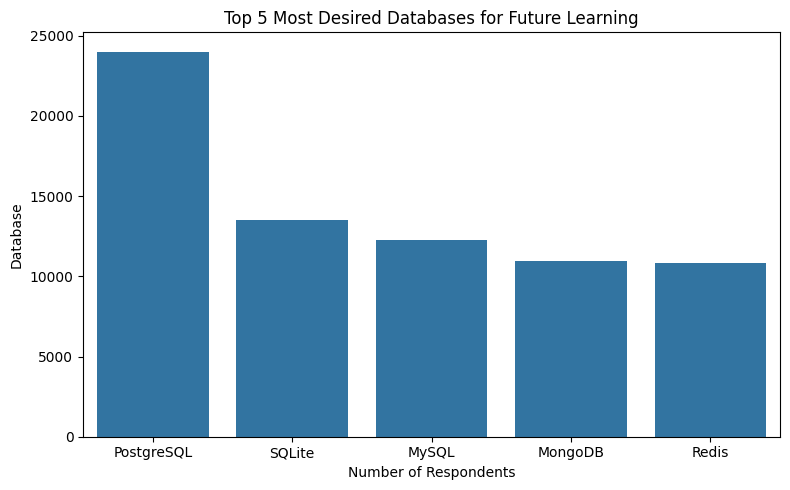

In [10]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""

df_dbs = pd.read_sql_query(QUERY, conn)
df_dbs = df_dbs.dropna().reset_index(drop=True)
db_series = df_dbs['DatabaseWantToWorkWith'].str.split(';')
# Flatten the list of lists into a single Series
db_flat = pd.Series([db for sublist in db_series for db in sublist])

# Count occurrences of each database
db_counts = db_flat.value_counts()
# Get top 5 databases
top_5_db = db_counts.head(5)
plt.figure(figsize=(8, 5))
sns.barplot(y=top_5_db.values, x=top_5_db.index)

plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


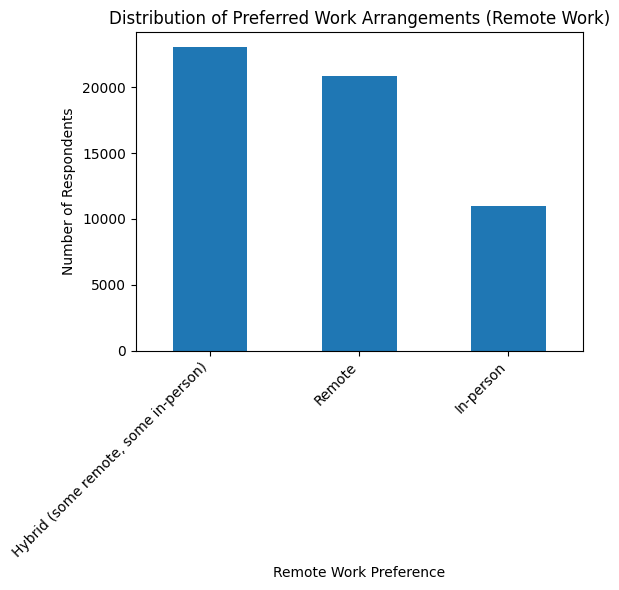

In [11]:
## Write your code here
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""

df_remote_work = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each remote work preference
remote_work_counts = df_remote_work['RemoteWork'].value_counts()

# Create a figure and axes for the plot
plt.figure(figsize=(6, 6))

# Plot a histogram/bar chart of remote work preferences
remote_work_counts.plot(kind='bar')

plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Preferred Work Arrangements (Remote Work)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


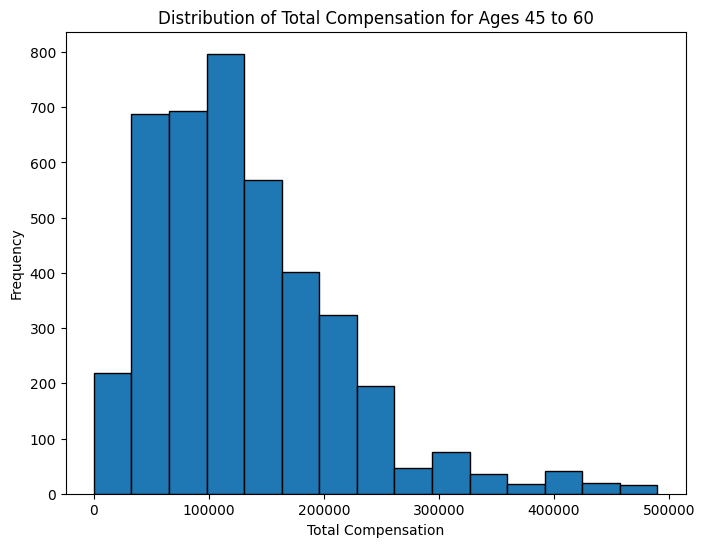

In [12]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main
WHERE Age BETWEEN 45 AND 60
"""

df_mid_career_comptotal = pd.read_sql_query(QUERY, conn)

# Convert 'CompTotal' to numeric, coercing errors
df_mid_career_comptotal['CompTotal'] = pd.to_numeric(df_mid_career_comptotal['CompTotal'], errors='coerce')
# Remove rows where 'CompTotal' is NaN after coercion
df_mid_career_comptotal.dropna(subset=['CompTotal'], inplace=True)

# Filter out extremely large values that might skew the visualization
df_mid_career_comptotal = df_mid_career_comptotal[df_mid_career_comptotal['CompTotal'] < 500000].copy()

plt.figure(figsize=(8, 6))
plt.hist(df_mid_career_comptotal['CompTotal'], bins=15, edgecolor='black')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation for Ages 45 to 60')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


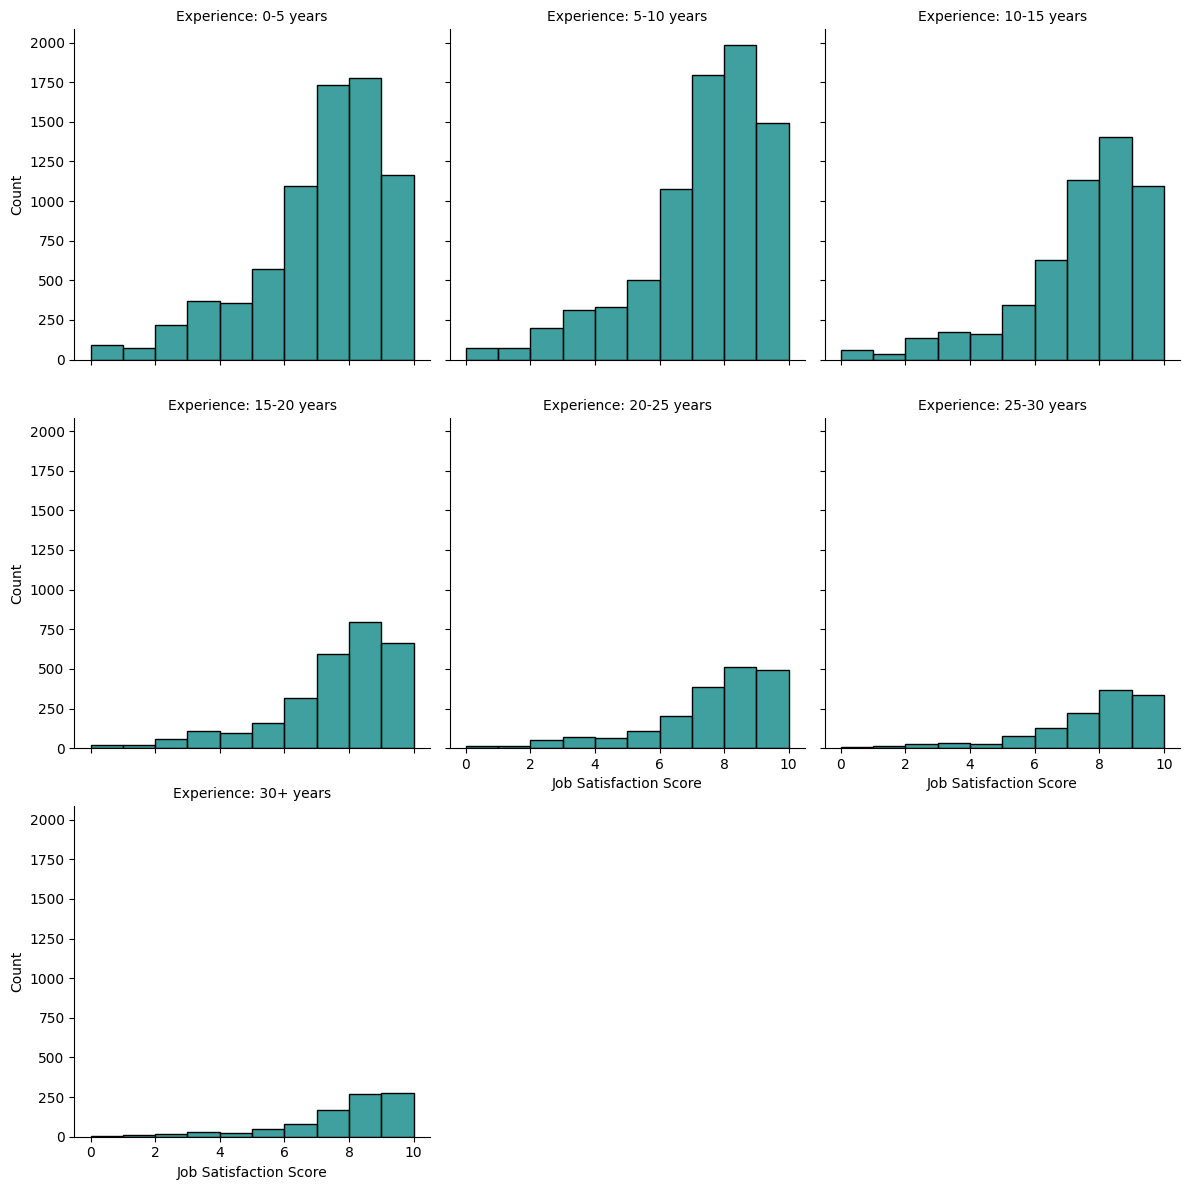

In [13]:
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""

df_jobsat_yearscodepro = pd.read_sql_query(QUERY, conn)

# Convert 'YearsCodePro' to numeric, coercing errors
df_jobsat_yearscodepro['YearsCodePro'] = pd.to_numeric(df_jobsat_yearscodepro['YearsCodePro'], errors='coerce')
# Convert 'JobSat' to numeric, coercing errors
df_jobsat_yearscodepro['JobSat'] = pd.to_numeric(df_jobsat_yearscodepro['JobSat'], errors='coerce')

# Remove rows where either 'YearsCodePro' or 'JobSat' is NaN after coercion
df_jobsat_yearscodepro.dropna(subset=['YearsCodePro', 'JobSat'], inplace=True)

bins = [0, 5, 10, 15, 20, 25, 30, 40]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
df_jobsat_yearscodepro['ExperienceRange'] = pd.cut(df_jobsat_yearscodepro['YearsCodePro'], bins=bins, labels=labels, right=False)
g = sns.FacetGrid(df_jobsat_yearscodepro, col='ExperienceRange', col_wrap=3, height=4)
g.map_dataframe(sns.histplot, x='JobSat', bins=10, color='teal')
g.set_titles("Experience: {col_name} years")
g.set_axis_labels("Job Satisfaction Score", "Count")
g.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [14]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
